# Breast Cancer Diagnostic
## The goal of this project is to build a model able to predict the diagnosis of breast cancer tissues as malignant or benign. 

- Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. 

- Class distribution: 357 benign, 212 malignant. More info about this dataset here

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import (roc_auc_score, confusion_matrix, recall_score, precision_score, RocCurveDisplay, 
                             accuracy_score, plot_confusion_matrix, auc, classification_report)
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
import plotly.express as px

In [2]:
# import data
X= pd.read_csv("X.csv")
y=pd.read_csv("y.csv")
y=y.values.ravel()

In [3]:
xWorst=X.iloc[:,20:30].copy().drop(["perimeter_worst", "area_worst", "concavity_worst", 
                                    "concave points_worst", 'fractal_dimension_worst'], axis=1)
random=42

In [4]:
X_train, X_test, y_train, y_test = train_test_split(xWorst, y, test_size=0.30, random_state=random)

## Logistic Regression

In [5]:
lr= LogisticRegression(random_state=random, max_iter=5000)
lr= lr.fit(X_train, y_train)
y_train_pred=lr.predict(X_train)
y_test_pred=lr.predict(X_test)
print("Training Accuracy: ", lr.score(X_train, y_train))
print("Test Accuracy: ", lr.score(X_test, y_test))
print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

Training Accuracy:  0.949748743718593
Test Accuracy:  0.9649122807017544
Training ROC_AUC:  0.9423196140265762
Test ROC_AUC:  0.958994708994709


## Tuning

In [6]:
# define models and parameters
# define grid search
param_grid={'solver': ['newton-cg', 'lbfgs', 'liblinear'], 
            'penalty':['l2'],
            'C':[100, 10, 1.0, 0.1, 0.01, 1000],
           'max_iter': [5000]}

#why? keep the balance in the splits
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search= GridSearchCV(lr, param_grid, cv=cv, scoring='roc_auc')
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)
grid_search.best_score_

LogisticRegression(C=1000, max_iter=5000, random_state=42, solver='newton-cg')


0.9884126984126984

In [7]:
# define models and parameters
# define grid search
param_grid={'solver': ['newton-cg', 'lbfgs', 'liblinear'], 
            'penalty':['l2'],
            'C':[900, 1000,2000,3000,3100, 3500],
           'max_iter': [5000]}

#why? keep the balance in the splits
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search= GridSearchCV(lr, param_grid, cv=cv, scoring='roc_auc')
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)
grid_search.best_score_

LogisticRegression(C=3000, max_iter=5000, random_state=42, solver='newton-cg')


0.9886857142857143

In [8]:
results=pd.DataFrame(grid_search.cv_results_)
results.sort_values(by=['rank_test_score'], inplace=True)
results.head(10)
#order by rank test score

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_max_iter,param_penalty,param_solver,params,split0_test_score,...,split23_test_score,split24_test_score,split25_test_score,split26_test_score,split27_test_score,split28_test_score,split29_test_score,mean_test_score,std_test_score,rank_test_score
9,0.067550,0.013429,0.005602,0.001598,3000,5000,l2,newton-cg,"{'C': 3000, 'max_iter': 5000, 'penalty': 'l2',...",0.994667,...,0.978667,1.0,1.0,1.0,1.0,0.948571,1.0,0.988686,0.017795,1
10,0.065882,0.008355,0.007305,0.001869,3000,5000,l2,lbfgs,"{'C': 3000, 'max_iter': 5000, 'penalty': 'l2',...",0.994667,...,0.978667,1.0,1.0,1.0,1.0,0.948571,1.0,0.988686,0.017795,1
12,0.068779,0.014274,0.005837,0.001726,3100,5000,l2,newton-cg,"{'C': 3100, 'max_iter': 5000, 'penalty': 'l2',...",0.994667,...,0.978667,1.0,1.0,1.0,1.0,0.948571,1.0,0.988686,0.017795,1
13,0.076554,0.031859,0.006319,0.001137,3100,5000,l2,lbfgs,"{'C': 3100, 'max_iter': 5000, 'penalty': 'l2',...",0.994667,...,0.978667,1.0,1.0,1.0,1.0,0.948571,1.0,0.988686,0.017795,1
8,0.011055,0.004811,0.008732,0.003252,2000,5000,l2,liblinear,"{'C': 2000, 'max_iter': 5000, 'penalty': 'l2',...",0.994667,...,0.976000,1.0,1.0,1.0,1.0,0.948571,1.0,0.988597,0.017851,5
6,0.055427,0.009468,0.004521,0.000934,2000,5000,l2,newton-cg,"{'C': 2000, 'max_iter': 5000, 'penalty': 'l2',...",0.994667,...,0.976000,1.0,1.0,1.0,1.0,0.948571,1.0,0.988597,0.017851,5
7,0.040397,0.008558,0.004703,0.001269,2000,5000,l2,lbfgs,"{'C': 2000, 'max_iter': 5000, 'penalty': 'l2',...",0.994667,...,0.976000,1.0,1.0,1.0,1.0,0.948571,1.0,0.988597,0.017851,5
15,0.076429,0.020433,0.006359,0.001891,3500,5000,l2,newton-cg,"{'C': 3500, 'max_iter': 5000, 'penalty': 'l2',...",0.994667,...,0.978667,1.0,1.0,1.0,1.0,0.945714,1.0,0.988502,0.017979,8
2,0.010097,0.001759,0.008764,0.001728,900,5000,l2,liblinear,"{'C': 900, 'max_iter': 5000, 'penalty': 'l2', ...",0.994667,...,0.973333,1.0,1.0,1.0,1.0,0.945714,1.0,0.988502,0.018201,8
16,0.067549,0.014022,0.007348,0.001817,3500,5000,l2,lbfgs,"{'C': 3500, 'max_iter': 5000, 'penalty': 'l2',...",0.994667,...,0.978667,1.0,1.0,1.0,1.0,0.945714,1.0,0.988502,0.017979,8


##### Tuned Model

In [44]:
lr= LogisticRegression(C=3000, max_iter=5000, random_state=42, solver='newton-cg')
lr= lr.fit(X_train, y_train)
y_train_pred=lr.predict(X_train)
y_test_pred=lr.predict(X_test)
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))
print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

0.9723618090452262
0.9707602339181286
Training ROC_AUC:  0.9684779386000378
Test ROC_AUC:  0.9702380952380952


Accuracy : 97.08
precision : 95.31
recall : 96.83


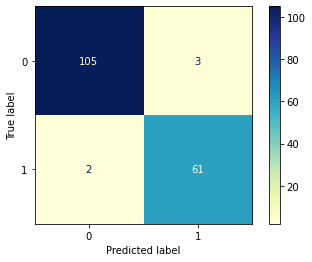

In [45]:
print('Accuracy :', round(accuracy_score(y_test,y_test_pred)*100,2))
print('precision :', round(precision_score(y_test,y_test_pred)*100,2))
print('recall :', round(recall_score(y_test,y_test_pred)*100,2))
plot_confusion_matrix(lr, X_test, y_test, cmap='YlGnBu')
plt.show()

In [51]:
target_names = ['Benign', 'Malignant']
print(classification_report(y_test, y_test_pred, target_names=target_names))

              precision    recall  f1-score   support

      Benign       0.98      0.97      0.98       108
   Malignant       0.95      0.97      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



Text(0.5, 0, 'False Positive Rate')

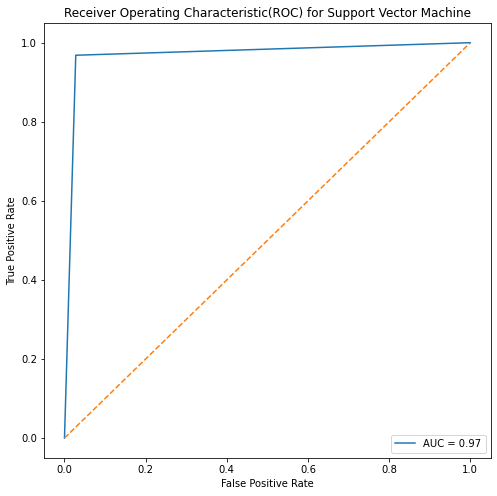

In [11]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_test_pred)
auc_sc = auc(fpr, tpr)
# Draw ROC curve:
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label="AUC = %0.2f"%auc_sc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.legend(loc='lower right')
plt.title("Receiver Operating Characteristic(ROC) for Support Vector Machine")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")

### LASSO Tuning

In [12]:
# define models and parameters
# define grid search
param_grid={'solver': ['liblinear'], 
            'penalty':['l1'],
            'C':[100, 10, 1.0, 0.1, 0.01, 1000],
           'max_iter': [5000]}

#why? keep the balance in the splits
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search= GridSearchCV(lr, param_grid, cv=cv, scoring='roc_auc')
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)
grid_search.best_score_

LogisticRegression(C=100, max_iter=5000, penalty='l1', random_state=42,
                   solver='liblinear')


0.9880507936507936

In [13]:
results=pd.DataFrame(grid_search.cv_results_)
results.sort_values(by=['rank_test_score'], inplace=True)
results.head(10)
#order by rank test score

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_max_iter,param_penalty,param_solver,params,split0_test_score,...,split23_test_score,split24_test_score,split25_test_score,split26_test_score,split27_test_score,split28_test_score,split29_test_score,mean_test_score,std_test_score,rank_test_score
0,0.027761,0.007298,0.005152,0.001331,100,5000,l1,liblinear,"{'C': 100, 'max_iter': 5000, 'penalty': 'l1', ...",0.994667,...,0.978667,1.000000,1.000000,1.000000,1.000000,0.942857,1.000000,0.988051,0.018678,1
5,0.028348,0.006640,0.005399,0.002057,1000,5000,l1,liblinear,"{'C': 1000, 'max_iter': 5000, 'penalty': 'l1',...",0.992000,...,0.978667,1.000000,1.000000,1.000000,1.000000,0.945714,1.000000,0.987968,0.018403,2
1,0.020310,0.002921,0.004671,0.000760,10,5000,l1,liblinear,"{'C': 10, 'max_iter': 5000, 'penalty': 'l1', '...",0.994667,...,0.965333,1.000000,1.000000,1.000000,1.000000,0.942857,1.000000,0.987962,0.018893,3
2,0.011922,0.001566,0.005633,0.001177,1,5000,l1,liblinear,"{'C': 1.0, 'max_iter': 5000, 'penalty': 'l1', ...",0.997333,...,0.960000,1.000000,0.997333,1.000000,1.000000,0.922857,1.000000,0.986646,0.018949,4
3,0.006744,0.001085,0.004401,0.000786,0.1,5000,l1,liblinear,"{'C': 0.1, 'max_iter': 5000, 'penalty': 'l1', ...",0.961333,...,0.960000,0.952000,0.957333,0.994667,0.994667,0.854286,0.983333,0.960571,0.032155,5
4,0.005778,0.001068,0.004348,0.001125,0.01,5000,l1,liblinear,"{'C': 0.01, 'max_iter': 5000, 'penalty': 'l1',...",0.626667,...,0.712000,0.581333,0.538667,0.634667,0.885333,0.602857,0.708333,0.660958,0.100771,6


##### Tuned Model

In [14]:
lr= LogisticRegression(penalty='l1', C=100, solver='liblinear', random_state=random)
lr= lr.fit(X_train, y_train)
y_train_pred=lr.predict(X_train)
y_test_pred=lr.predict(X_test)
print("Training Score: ",lr.score(X_train, y_train))
print("Test Score: ", lr.score(X_test, y_test))
print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

Training Score:  0.9698492462311558
Test Score:  0.9707602339181286
Training ROC_AUC:  0.9651222339020512
Test ROC_AUC:  0.9702380952380952


Accuracy : 97.08
precision : 95.31
recall : 96.83


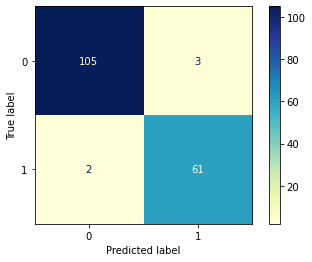

In [15]:
print('Accuracy :', round(accuracy_score(y_test,y_test_pred)*100,2))
print('precision :', round(precision_score(y_test,y_test_pred)*100,2))
print('recall :', round(recall_score(y_test,y_test_pred)*100,2))
plot_confusion_matrix(lr, X_test, y_test, cmap='YlGnBu')
plt.show()

In [16]:
# last 5 are what was predicted incorrectly
residuals = lr.predict_proba(X_test)[:,1] - y_test
sortIdx=np.argsort(np.abs(residuals))
residDF=X_test.iloc[sortIdx].copy()
residDF["resid"]=residuals[sortIdx]
residDF['y_true']=y_test[sortIdx]
residDF['y_pred']=y_test_pred[sortIdx]
# print(residDF.std())
outliers=residDF.tail(15)
outliers
# outliers.std()
#sns.regplot(x = residuals, y = y_test_pred, scatter = True, color = 'red');

,radius_worst,texture_worst,smoothness_worst,compactness_worst,symmetry_worst,resid,y_true,y_pred
204,14.97,24.64,0.1426,0.2378,0.3014,0.116159,0,0
457,14.35,34.23,0.1289,0.1063,0.2444,0.125634,0,0
396,14.80,27.20,0.1428,0.2570,0.2666,0.128981,0,0
235,15.33,30.28,0.1287,0.1513,0.2226,0.139683,0,0
329,17.73,25.21,0.1426,0.2116,0.2736,-0.156472,1,1
90,16.11,29.11,0.1115,0.1766,0.2522,0.160591,0,0
542,16.51,32.29,0.1060,0.1376,0.2722,0.408350,0,0
39,15.53,26.02,0.1610,0.4225,0.2807,-0.420177,1,1
86,16.21,29.25,0.1306,0.1976,0.3020,-0.439861,1,1
208,14.55,29.16,0.1349,0.4402,0.4128,0.452389,0,0


In [17]:
residDF.groupby('y_true').mean()

,radius_worst,texture_worst,smoothness_worst,compactness_worst,symmetry_worst,resid,y_pred
y_true,,,,,,,
0,13.188380,23.808611,0.125902,0.183516,0.276775,0.042306,0.027778
1,21.436032,29.965079,0.147222,0.408268,0.324095,-0.042840,0.968254


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:188: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


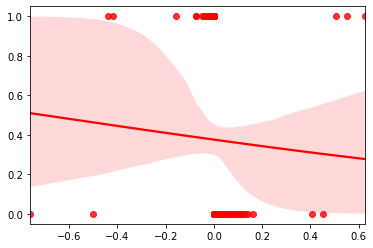

In [18]:
sns.regplot(x = residuals, y = y_test_pred, logistic=True, scatter = True, color = 'red');

## Naive Bayes

In [19]:
from sklearn.naive_bayes import GaussianNB
#normal data helped this
gnb = GaussianNB()
gnb = gnb.fit(X_train, y_train)
y_train_pred=gnb.predict(X_train)
y_test_pred=gnb.predict(X_test)
print(gnb.score(X_train, y_train))
print(gnb.score(X_test, y_test))
print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

0.9472361809045227
0.9473684210526315
Training ROC_AUC:  0.9389639093285894
Test ROC_AUC:  0.9451058201058201


#### Bernoulli

In [20]:
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
clf = clf.fit(X_train, y_train)
y_train_pred=clf.predict(X_train)
y_test_pred=clf.predict(X_test)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))
print("Training RMSE: ", np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))
print("Test RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

0.6256281407035176
0.631578947368421
Training RMSE:  0.6118593460073013
Test RMSE:  0.6069769786668839
Training ROC_AUC:  0.5
Test ROC_AUC:  0.5


### Tuning

In [21]:
param_grid= {'var_smoothing': np.logspace(0,-9, num=100)
        }
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search= GridSearchCV(gnb, param_grid, cv=cv, scoring='roc_auc')
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)
grid_search.best_score_

GaussianNB(var_smoothing=0.0006579332246575676)


0.9873111111111111

var_smoothing is a stability calculation to widen (or smooth) the curve and therefore account for more samples that are further away from the distribution mean. In this case, np.logspace returns numbers spaced evenly on a log scale, starts from 0, ends at -9, and generates 100 samples.
from https://medium.com/analytics-vidhya/how-to-improve-naive-bayes-9fa698e14cba

In [22]:
results=pd.DataFrame(grid_search.cv_results_)
results.sort_values(by=['rank_test_score'], inplace=True)
results.head(10)
#order by rank test score

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_var_smoothing,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split23_test_score,split24_test_score,split25_test_score,split26_test_score,split27_test_score,split28_test_score,split29_test_score,mean_test_score,std_test_score,rank_test_score
35,0.003934,0.000627,0.004322,0.000768,0.000657933,{'var_smoothing': 0.0006579332246575676},0.997333,0.994667,1.0,0.968000,...,0.957333,1.000000,1.000000,1.000000,1.0,0.945714,0.997222,0.987311,0.017343,1
39,0.004351,0.001133,0.004616,0.000688,0.000284804,{'var_smoothing': 0.0002848035868435802},0.994667,0.997333,1.0,0.970667,...,0.962667,1.000000,0.994667,0.994667,1.0,0.948571,1.000000,0.987230,0.017501,2
36,0.004285,0.000821,0.004444,0.000937,0.00053367,{'var_smoothing': 0.0005336699231206307},0.997333,0.994667,1.0,0.970667,...,0.957333,1.000000,1.000000,1.000000,1.0,0.948571,0.997222,0.987226,0.017768,3
34,0.005052,0.000960,0.005081,0.000986,0.000811131,{'var_smoothing': 0.0008111308307896872},0.997333,0.994667,1.0,0.968000,...,0.960000,1.000000,1.000000,1.000000,1.0,0.942857,0.997222,0.987222,0.017170,4
37,0.003967,0.000727,0.004274,0.000707,0.000432876,{'var_smoothing': 0.0004328761281083057},0.994667,0.994667,1.0,0.973333,...,0.960000,1.000000,0.997333,1.000000,1.0,0.945714,0.997222,0.987131,0.017769,5
40,0.004150,0.000654,0.004405,0.000666,0.000231013,{'var_smoothing': 0.0002310129700083158},0.994667,0.997333,1.0,0.970667,...,0.960000,1.000000,0.994667,0.994667,1.0,0.945714,1.000000,0.986944,0.018012,6
33,0.005300,0.001487,0.005858,0.001334,0.001,{'var_smoothing': 0.001},0.997333,0.994667,1.0,0.970667,...,0.960000,1.000000,1.000000,1.000000,1.0,0.940000,0.997222,0.986939,0.016995,7
41,0.003421,0.000621,0.003610,0.000555,0.000187382,{'var_smoothing': 0.0001873817422860383},0.994667,0.997333,1.0,0.968000,...,0.965333,1.000000,0.994667,0.994667,1.0,0.945714,1.000000,0.986938,0.017904,8
38,0.003957,0.000750,0.004326,0.000736,0.000351119,{'var_smoothing': 0.0003511191734215131},0.994667,0.994667,1.0,0.973333,...,0.957333,1.000000,0.994667,0.997333,1.0,0.945714,1.000000,0.986868,0.018191,9
42,0.003951,0.000717,0.004278,0.000790,0.000151991,{'var_smoothing': 0.0001519911082952933},0.992000,1.000000,1.0,0.965333,...,0.965333,0.997333,0.992000,0.994667,1.0,0.945714,1.000000,0.986849,0.017823,10


##### Tuned Model

In [23]:
gnb = GaussianNB(var_smoothing=0.0006579332246575676)
gnb = gnb.fit(X_train, y_train)
y_train_pred=gnb.predict(X_train)
y_test_pred=gnb.predict(X_test)
print(gnb.score(X_train, y_train))
print(gnb.score(X_test, y_test))
print("Training RMSE: ", np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))
print("Test RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

0.9472361809045227
0.9707602339181286
Training RMSE:  0.2297037637816964
Test RMSE:  0.17099639201419234
Training ROC_AUC:  0.9362685641896445
Test ROC_AUC:  0.9636243386243386


Text(0.5, 0, 'False Positive Rate')

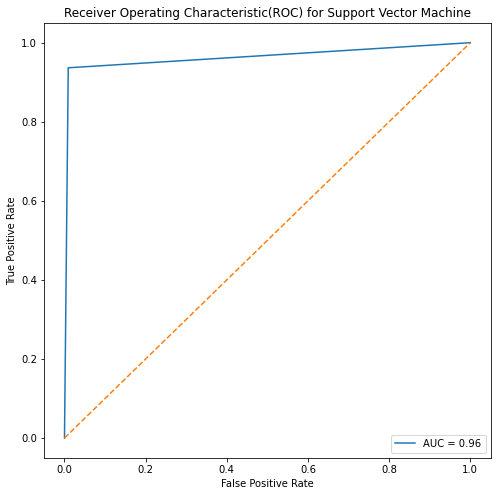

In [24]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_test_pred)
auc_sc = auc(fpr, tpr)
# Draw ROC curve:
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label="AUC = %0.2f"%auc_sc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.legend(loc='lower right')
plt.title("Receiver Operating Characteristic(ROC) for Support Vector Machine")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")

## KNN

In [78]:
from sklearn.neighbors import KNeighborsClassifier
#KNN is more sensititve to noise
transformer = RobustScaler().fit(X)
X_scaled=transformer.transform(X)
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=random)
#scaling didn't help*****************************
knn=KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
y_train_pred=knn.predict(X_train_scaled)
y_test_pred=knn.predict(X_test_scaled)
print(knn.score(X_train_scaled, y_train))
print(knn.score(X_test_scaled, y_test))
print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

0.9221105527638191
0.9590643274853801
Training ROC_AUC:  0.9067545349181962
Test ROC_AUC:  0.9477513227513227


In [84]:
from sklearn.preprocessing import MinMaxScaler
#KNN is more sensititve to noise
transformer = MinMaxScaler().fit(X)
X_scaled=transformer.transform(X)
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=random)
#scaling didn't help*****************************
knn=KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
y_train_pred=knn.predict(X_train_scaled)
y_test_pred=knn.predict(X_test_scaled)
print(knn.score(X_train_scaled, y_train))
print(knn.score(X_test_scaled, y_test))
print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

0.9221105527638191
0.9590643274853801
Training ROC_AUC:  0.9067545349181962
Test ROC_AUC:  0.9477513227513227


### Tuning

In [85]:
param_grid= {'n_neighbors': np.arange(1,40),
            'p':[1,2]}
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search= GridSearchCV(knn, param_grid, cv=cv, scoring='roc_auc')
grid_search.fit(X_train_scaled, y_train)
print(grid_search.best_estimator_)
grid_search.best_score_

KNeighborsClassifier(n_neighbors=21, p=1)


0.9708566137566137

In [86]:
results=pd.DataFrame(grid_search.cv_results_)
results.sort_values(by=['rank_test_score'], inplace=True)
results.head(10)
#order by rank test score

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_p,params,split0_test_score,split1_test_score,split2_test_score,...,split23_test_score,split24_test_score,split25_test_score,split26_test_score,split27_test_score,split28_test_score,split29_test_score,mean_test_score,std_test_score,rank_test_score
40,0.003529,0.000773,0.004284,0.000747,21,1,"{'n_neighbors': 21, 'p': 1}",0.978667,0.996000,0.992000,...,0.965333,0.977333,0.980000,0.993333,0.996000,0.868571,0.972222,0.970857,0.030315,1
38,0.003457,0.000875,0.004106,0.000746,20,1,"{'n_neighbors': 20, 'p': 1}",0.978667,0.993333,0.989333,...,0.941333,0.976000,0.985333,0.997333,0.997333,0.868571,0.972222,0.970729,0.030571,2
36,0.003359,0.000606,0.004541,0.000773,19,1,"{'n_neighbors': 19, 'p': 1}",0.978667,0.994667,0.993333,...,0.941333,0.977333,0.986667,0.992000,0.997333,0.874286,0.972222,0.970589,0.030254,3
42,0.003675,0.000806,0.004503,0.000994,22,1,"{'n_neighbors': 22, 'p': 1}",0.978667,0.996000,0.992000,...,0.961333,0.974667,0.977333,0.993333,0.994667,0.868571,0.972222,0.970053,0.030255,4
46,0.003293,0.000448,0.004422,0.000869,24,1,"{'n_neighbors': 24, 'p': 1}",0.974667,0.997333,0.993333,...,0.958667,0.973333,0.976000,0.993333,0.994667,0.862857,0.986111,0.969385,0.031476,5
44,0.003661,0.000593,0.004650,0.001047,23,1,"{'n_neighbors': 23, 'p': 1}",0.974667,0.994667,0.990667,...,0.960000,0.973333,0.977333,0.990667,0.994667,0.868571,0.972222,0.969299,0.030338,6
48,0.003582,0.000605,0.004464,0.000921,25,1,"{'n_neighbors': 25, 'p': 1}",0.969333,0.997333,0.992000,...,0.958667,0.973333,0.973333,0.994667,0.994667,0.862857,0.986111,0.968854,0.031651,7
50,0.004212,0.000962,0.005480,0.000898,26,1,"{'n_neighbors': 26, 'p': 1}",0.968000,0.998667,0.993333,...,0.958667,0.969333,0.972000,0.994667,0.994667,0.861429,0.986111,0.968135,0.032153,8
56,0.003603,0.000563,0.004882,0.000881,29,1,"{'n_neighbors': 29, 'p': 1}",0.970667,1.000000,0.990667,...,0.952000,0.969333,0.970667,0.993333,0.994667,0.858571,0.986111,0.967857,0.032761,9
32,0.003911,0.000776,0.004749,0.000863,17,1,"{'n_neighbors': 17, 'p': 1}",0.981333,0.994667,0.993333,...,0.941333,0.981333,0.985333,0.989333,0.997333,0.880000,0.972222,0.967585,0.032415,10


##### Tuned Model

In [87]:
knn=KNeighborsClassifier(n_neighbors=21, p=1)
knn.fit(X_train_scaled, y_train)
y_train_pred=knn.predict(X_train_scaled)
y_test_pred=knn.predict(X_test_scaled)
print(knn.score(X_train_scaled, y_train))
print(knn.score(X_test_scaled, y_test))
print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))


0.914572864321608
0.9590643274853801
Training ROC_AUC:  0.895339748254764
Test ROC_AUC:  0.9477513227513227


In [82]:
knn=KNeighborsClassifier(n_neighbors=17, p=1)
knn.fit(X_train_scaled, y_train)
y_train_pred=knn.predict(X_train_scaled)
y_test_pred=knn.predict(X_test_scaled)
print(knn.score(X_train_scaled, y_train))
print(knn.score(X_test_scaled, y_test))
print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

0.914572864321608
0.9649122807017544
Training ROC_AUC:  0.895339748254764
Test ROC_AUC:  0.9523809523809523


Text(0.5, 0, 'False Positive Rate')

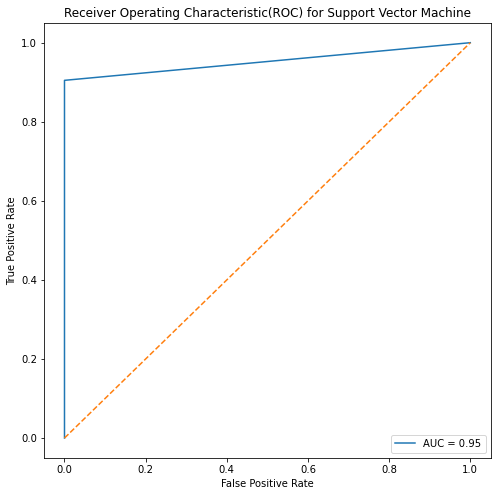

In [83]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_test_pred)
auc_sc = auc(fpr, tpr)
# Draw ROC curve:
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label="AUC = %0.2f"%auc_sc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.legend(loc='lower right')
plt.title("Receiver Operating Characteristic(ROC) for Support Vector Machine")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")

## SVM

In [31]:
#SVM
from sklearn.svm import SVC
clf = SVC()
clf = clf.fit(X_train, y_train)
y_train_pred=clf.predict(X_train)
y_test_pred=clf.predict(X_test)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))
print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

0.9195979899497487
0.9473684210526315
Training ROC_AUC:  0.8980081399423196
Test ROC_AUC:  0.9351851851851851


In [32]:
clf.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

### Tuning

In [33]:
param_grid= {'kernel' : ['poly', 'rbf', 'sigmoid'],
             'C' : [50, 10, 1.0, 0.1, 0.01],
             'gamma' : ['scale']}
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search= GridSearchCV(clf, param_grid, cv=cv , scoring="roc_auc")
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)
grid_search.best_score_

SVC(C=50, kernel='poly')


0.9862777777777778

In [34]:
results=pd.DataFrame(grid_search.cv_results_)
results.sort_values(by=['rank_test_score'], inplace=True)
results.head(10)
#order by rank test score

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,...,split23_test_score,split24_test_score,split25_test_score,split26_test_score,split27_test_score,split28_test_score,split29_test_score,mean_test_score,std_test_score,rank_test_score
0,0.006887,0.001516,0.004332,0.001161,50,scale,poly,"{'C': 50, 'gamma': 'scale', 'kernel': 'poly'}",1.000000,0.989333,...,0.962667,1.000000,1.000000,1.000000,1.000000,0.922857,1.000000,0.986278,0.018328,1
3,0.007412,0.001116,0.005143,0.000912,10,scale,poly,"{'C': 10, 'gamma': 'scale', 'kernel': 'poly'}",1.000000,0.989333,...,0.960000,0.997333,1.000000,1.000000,1.000000,0.914286,1.000000,0.983478,0.020502,2
1,0.005234,0.001084,0.003652,0.000643,50,scale,rbf,"{'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}",1.000000,0.989333,...,0.960000,1.000000,1.000000,1.000000,1.000000,0.928571,0.997222,0.983326,0.019882,3
4,0.006000,0.001075,0.004371,0.000620,10,scale,rbf,"{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}",0.994667,0.989333,...,0.957333,0.986667,0.997333,1.000000,1.000000,0.925714,0.997222,0.982346,0.019148,4
6,0.004986,0.000964,0.004238,0.000830,1,scale,poly,"{'C': 1.0, 'gamma': 'scale', 'kernel': 'poly'}",0.992000,0.984000,...,0.957333,0.984000,0.997333,0.994667,1.000000,0.920000,1.000000,0.980999,0.020477,5
7,0.005681,0.001020,0.004087,0.000817,1,scale,rbf,"{'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}",0.986667,0.976000,...,0.957333,0.984000,0.997333,1.000000,1.000000,0.914286,0.997222,0.980888,0.020688,6
9,0.005029,0.000911,0.004116,0.000739,0.1,scale,poly,"{'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}",0.989333,0.962667,...,0.960000,0.981333,0.997333,0.989333,1.000000,0.928571,1.000000,0.980222,0.019763,7
10,0.006926,0.001018,0.004310,0.000685,0.1,scale,rbf,"{'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}",0.970667,0.938667,...,0.952000,0.978667,0.989333,0.981333,1.000000,0.911429,1.000000,0.975154,0.022669,8
13,0.007347,0.001277,0.004500,0.000998,0.01,scale,rbf,"{'C': 0.01, 'gamma': 'scale', 'kernel': 'rbf'}",0.962667,0.917333,...,0.949333,0.976000,0.986667,0.960000,0.997333,0.914286,1.000000,0.970744,0.021926,9
12,0.005628,0.000841,0.004007,0.000545,0.01,scale,poly,"{'C': 0.01, 'gamma': 'scale', 'kernel': 'poly'}",0.957333,0.880000,...,0.944000,0.970667,0.984000,0.930667,0.989333,0.914286,0.994444,0.960805,0.025259,10


##### Tuned Model

In [35]:
clf = SVC(C=50, kernel='poly')
clf = clf.fit(X_train, y_train)
y_train_pred=clf.predict(X_train)
y_test_pred=clf.predict(X_test)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))
print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

0.957286432160804
0.9707602339181286
Training ROC_AUC:  0.9510390555510634
Test ROC_AUC:  0.966931216931217


In [36]:
clf = SVC(C=10, kernel='poly')
clf = clf.fit(X_train, y_train)
y_train_pred=clf.predict(X_train)
y_test_pred=clf.predict(X_test)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))
print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

0.9447236180904522
0.9590643274853801
Training ROC_AUC:  0.9356082046306029
Test ROC_AUC:  0.9543650793650793


## PLS Regression

In [37]:
X_train_full, X_test_full, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
from sklearn.cross_decomposition import PLSRegression
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown = 'ignore',sparse=False)
trainy_p = enc.fit_transform(y_train.reshape(-1,1))
testy_p = enc.transform(y_test.reshape(-1,1))

pls=PLSRegression(n_components=8)
pls.fit(X_train_full, trainy_p)
y_train_pred=pls.predict(X_train_full)
#print(y_train_pred)
y_test_pred=pls.predict(X_test_full)
print(pls.score(X_train_full, trainy_p))
print(pls.score(X_test_full, testy_p))

0.7663739411866044
0.7428791076062854


## Decision trees

In [55]:
# Decision trees
from sklearn import tree
clf=tree.DecisionTreeClassifier(random_state=42)
clf=clf.fit(X_train, y_train)
y_train_pred=clf.predict(X_train)
y_test_pred=clf.predict(X_test)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

print("Training RMSE: ", np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))
print("Test RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

1.0
0.9649122807017544
Training RMSE:  0.0
Test RMSE:  0.1873171623163388
Training ROC_AUC:  1.0
Test ROC_AUC:  0.958994708994709


### Tuning

In [56]:
maxDepth=clf.tree_.max_depth
param_grid = {'max_depth':range(1, maxDepth+1),
              'max_features':[0.2,0.4,0.6,0.8], 
              'max_leaf_nodes':[20,30,40,50],
             'min_samples_leaf': [1,2,5,10]}
clf = tree.DecisionTreeClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search= GridSearchCV(clf, param_grid, cv=cv , scoring="roc_auc")
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
grid_search.best_score_

{'max_depth': 6, 'max_features': 0.6, 'max_leaf_nodes': 50, 'min_samples_leaf': 10}


0.9670354497354499

In [57]:
results=pd.DataFrame(grid_search.cv_results_)
results.sort_values(by=['rank_test_score'], inplace=True)
results.head(10)
#order by rank test score

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_max_leaf_nodes,param_min_samples_leaf,params,split0_test_score,...,split23_test_score,split24_test_score,split25_test_score,split26_test_score,split27_test_score,split28_test_score,split29_test_score,mean_test_score,std_test_score,rank_test_score
367,0.003080,0.000584,0.003047,0.000633,6,0.6,50,10,"{'max_depth': 6, 'max_features': 0.6, 'max_lea...",0.957333,...,0.945333,0.994667,0.920000,0.956000,0.996000,0.945714,0.973611,0.967035,0.024762,1
307,0.003307,0.000577,0.003037,0.000486,5,0.8,20,10,"{'max_depth': 5, 'max_features': 0.8, 'max_lea...",0.961333,...,0.904000,0.994667,0.909333,0.981333,0.996000,0.941429,0.991667,0.967008,0.027184,2
191,0.002494,0.000520,0.002341,0.000468,3,0.8,50,10,"{'max_depth': 3, 'max_features': 0.8, 'max_lea...",0.913333,...,0.941333,1.000000,0.984000,0.993333,0.992000,0.922857,0.997222,0.966211,0.027668,3
447,0.003550,0.000693,0.003499,0.000740,7,0.8,50,10,"{'max_depth': 7, 'max_features': 0.8, 'max_lea...",0.994667,...,0.932000,0.966667,0.920000,0.996000,0.988000,0.871429,0.997222,0.965324,0.030196,4
239,0.002871,0.000818,0.002840,0.000672,4,0.6,50,10,"{'max_depth': 4, 'max_features': 0.6, 'max_lea...",0.941333,...,0.942667,0.980000,0.922667,0.993333,0.994667,0.937143,0.987500,0.965319,0.025318,5
443,0.002932,0.000591,0.002652,0.000626,7,0.8,40,10,"{'max_depth': 7, 'max_features': 0.8, 'max_lea...",0.910667,...,0.906667,0.994667,0.989333,1.000000,0.990667,0.894286,0.997222,0.964898,0.029870,6
375,0.003254,0.000508,0.003045,0.000673,6,0.8,30,10,"{'max_depth': 6, 'max_features': 0.8, 'max_lea...",0.910667,...,0.905333,0.996000,0.925333,0.997333,0.990667,0.981429,0.991667,0.964890,0.027711,7
363,0.003626,0.001030,0.003708,0.000955,6,0.6,40,10,"{'max_depth': 6, 'max_features': 0.6, 'max_lea...",0.954667,...,0.940000,0.994667,0.909333,0.980000,0.996000,0.875714,0.988889,0.964814,0.031569,8
379,0.003034,0.000567,0.002964,0.000699,6,0.8,40,10,"{'max_depth': 6, 'max_features': 0.8, 'max_lea...",0.910667,...,0.902667,0.976000,0.920000,0.941333,0.994667,0.915714,0.997222,0.964231,0.028463,9
419,0.003015,0.000688,0.002621,0.000543,7,0.6,20,10,"{'max_depth': 7, 'max_features': 0.6, 'max_lea...",0.978667,...,0.918667,0.964000,0.985333,0.968000,0.994667,0.934286,0.976389,0.964057,0.030533,10


##### Tuned Model

In [58]:
clf=tree.DecisionTreeClassifier(max_depth= 6, max_features= 0.6, max_leaf_nodes= 50, min_samples_leaf= 10)
clf=clf.fit(X_train, y_train)
y_train_pred=clf.predict(X_train)
y_test_pred=clf.predict(X_test)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

0.9371859296482412
0.935672514619883
Training ROC_AUC:  0.9214980728282257
Test ROC_AUC:  0.925925925925926


## Random Forest

In [75]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(random_state=42)
clf_rf.fit(X_train, y_train)
y_train_pred=clf_rf.predict(X_train)
y_test_pred=clf_rf.predict(X_test)
print(clf_rf.score(X_train, y_train))
print(clf_rf.score(X_test, y_test))

print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

1.0
0.9649122807017544
Training ROC_AUC:  1.0
Test ROC_AUC:  0.958994708994709


### Tuning

In [52]:
param_grid = {'max_depth':np.arange(4, 10),
              'max_features':[0.2,0.4,0.6,0.8],
              'n_estimators': [10,50,100,200,300,500,1000]}
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search= GridSearchCV(clf_rf, param_grid, cv=cv , scoring="roc_auc")
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)
grid_search.best_score_

RandomForestClassifier(max_depth=7, max_features=0.2, n_estimators=200,
                       random_state=42)


0.9871079365079365

In [53]:
results=pd.DataFrame(grid_search.cv_results_)
results.sort_values(by=['rank_test_score'], inplace=True)
results.head(10)
#order by rank test score

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,...,split23_test_score,split24_test_score,split25_test_score,split26_test_score,split27_test_score,split28_test_score,split29_test_score,mean_test_score,std_test_score,rank_test_score
87,0.325436,0.031475,0.022424,0.003710,7,0.2,200,"{'max_depth': 7, 'max_features': 0.2, 'n_estim...",0.989333,1.0,...,0.952000,1.0,0.978667,1.0,1.0,0.928571,0.997222,0.987108,0.019313,1
143,0.517340,0.097194,0.032994,0.007745,9,0.2,200,"{'max_depth': 9, 'max_features': 0.2, 'n_estim...",0.989333,1.0,...,0.949333,1.0,0.986667,1.0,1.0,0.928571,1.000000,0.987063,0.019881,2
93,0.164920,0.017420,0.011776,0.001141,7,0.4,100,"{'max_depth': 7, 'max_features': 0.4, 'n_estim...",0.992000,1.0,...,0.960000,1.0,0.976000,1.0,1.0,0.945714,1.000000,0.987063,0.015817,3
144,0.633161,0.117708,0.039335,0.006985,9,0.2,300,"{'max_depth': 9, 'max_features': 0.2, 'n_estim...",0.984000,1.0,...,0.949333,1.0,0.984000,1.0,1.0,0.928571,1.000000,0.986930,0.019405,4
115,0.357192,0.059880,0.023687,0.005692,8,0.2,200,"{'max_depth': 8, 'max_features': 0.2, 'n_estim...",0.986667,1.0,...,0.949333,1.0,0.978667,1.0,1.0,0.931429,1.000000,0.986844,0.019544,5
117,1.002752,0.129898,0.058044,0.011429,8,0.2,500,"{'max_depth': 8, 'max_features': 0.2, 'n_estim...",0.986667,1.0,...,0.949333,1.0,0.978667,1.0,1.0,0.928571,1.000000,0.986841,0.019642,6
59,0.307728,0.033625,0.020871,0.003151,6,0.2,200,"{'max_depth': 6, 'max_features': 0.2, 'n_estim...",0.984000,1.0,...,0.946667,1.0,0.984000,1.0,1.0,0.928571,1.000000,0.986838,0.020286,7
86,0.156512,0.013385,0.011919,0.001138,7,0.2,100,"{'max_depth': 7, 'max_features': 0.2, 'n_estim...",0.989333,1.0,...,0.949333,1.0,0.976000,1.0,1.0,0.928571,1.000000,0.986760,0.020148,8
65,0.161962,0.017280,0.012112,0.001871,6,0.4,100,"{'max_depth': 6, 'max_features': 0.4, 'n_estim...",0.994667,1.0,...,0.960000,1.0,0.981333,1.0,1.0,0.942857,1.000000,0.986683,0.016613,9
60,0.468708,0.052515,0.029991,0.002372,6,0.2,300,"{'max_depth': 6, 'max_features': 0.2, 'n_estim...",0.984000,1.0,...,0.949333,1.0,0.981333,1.0,1.0,0.934286,1.000000,0.986672,0.019604,10


##### Tuned Model

In [76]:
#Random Forest
clf_rf = RandomForestClassifier(max_depth=7, max_features=0.2, n_estimators=200,random_state=42)
clf_rf.fit(X_train, y_train)
y_train_pred=clf_rf.predict(X_train)
y_test_pred=clf_rf.predict(X_test)
print(clf_rf.score(X_train, y_train))
print(clf_rf.score(X_test, y_test))

print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

0.9974874371859297
0.9590643274853801
Training ROC_AUC:  0.9966442953020134
Test ROC_AUC:  0.9576719576719577


In [77]:
#Random Forest
clf_rf = RandomForestClassifier(max_depth=9, max_features=0.2, n_estimators=200,random_state=42)
clf_rf.fit(X_train, y_train)
y_train_pred=clf_rf.predict(X_train)
y_test_pred=clf_rf.predict(X_test)
print(clf_rf.score(X_train, y_train))
print(clf_rf.score(X_test, y_test))


print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

1.0
0.9649122807017544
Training ROC_AUC:  1.0
Test ROC_AUC:  0.9623015873015873


## Stochastic Gradient D

In [64]:
#SGD
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(max_iter=5000, random_state=random)
clf=clf.fit(X_train, y_train)
y_train_pred=clf.predict(X_train)
y_test_pred=clf.predict(X_test)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

0.9396984924623115
0.9590643274853801
Training ROC_AUC:  0.9342874855125199
Test ROC_AUC:  0.9576719576719577


In [65]:
param_grid = {'loss' : ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'],
              'penalty' : ['l2', 'l1', 'elasticnet'],
              'random_state':[random]
              }
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search= GridSearchCV(clf, param_grid, cv=cv , scoring="roc_auc")
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)
grid_search.best_score_

SGDClassifier(loss='squared_hinge', max_iter=5000, penalty='l1',
              random_state=42)


0.9832333333333333

In [66]:
results=pd.DataFrame(grid_search.cv_results_)
results.sort_values(by=['rank_test_score'], inplace=True)
results.head(10)
#order by rank test score

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_loss,param_penalty,param_random_state,params,split0_test_score,split1_test_score,...,split23_test_score,split24_test_score,split25_test_score,split26_test_score,split27_test_score,split28_test_score,split29_test_score,mean_test_score,std_test_score,rank_test_score
10,0.004542,0.000710,0.002679,0.000641,squared_hinge,l1,42,"{'loss': 'squared_hinge', 'penalty': 'l1', 'ra...",0.989333,0.994667,...,0.965333,1.000000,0.997333,1.000000,0.994667,0.934286,0.994444,0.983233,0.017198,1
1,0.003629,0.000516,0.002350,0.000442,hinge,l1,42,"{'loss': 'hinge', 'penalty': 'l1', 'random_sta...",0.997333,0.994667,...,0.962667,0.997333,0.986667,1.000000,1.000000,0.914286,1.000000,0.981743,0.021233,2
5,0.005550,0.001147,0.002695,0.000603,log,elasticnet,42,"{'loss': 'log', 'penalty': 'elasticnet', 'rand...",0.986667,1.000000,...,0.960000,0.997333,1.000000,0.994667,0.994667,0.920000,1.000000,0.980950,0.022535,3
13,0.004313,0.000984,0.002847,0.000624,perceptron,l1,42,"{'loss': 'perceptron', 'penalty': 'l1', 'rando...",0.989333,1.000000,...,0.960000,1.000000,0.976000,0.978667,1.000000,0.885714,0.997222,0.980465,0.023868,4
4,0.005067,0.000814,0.002850,0.001024,log,l1,42,"{'loss': 'log', 'penalty': 'l1', 'random_state...",0.997333,1.000000,...,0.965333,1.000000,0.994667,0.941333,0.997333,0.914286,0.994444,0.979566,0.023431,5
7,0.003897,0.000693,0.002684,0.000572,modified_huber,l1,42,"{'loss': 'modified_huber', 'penalty': 'l1', 'r...",0.997333,0.994667,...,0.962667,1.000000,0.994667,1.000000,1.000000,0.880000,0.988889,0.978121,0.028400,6
8,0.004445,0.001001,0.002575,0.000724,modified_huber,elasticnet,42,"{'loss': 'modified_huber', 'penalty': 'elastic...",1.000000,0.997333,...,0.962667,0.981333,0.992000,0.986667,0.997333,0.914286,0.969444,0.977824,0.021467,7
14,0.004538,0.000887,0.002754,0.000677,perceptron,elasticnet,42,"{'loss': 'perceptron', 'penalty': 'elasticnet'...",0.992000,1.000000,...,0.962667,0.994667,1.000000,1.000000,1.000000,0.862857,0.997222,0.976526,0.029269,8
3,0.004673,0.000906,0.002680,0.000615,log,l2,42,"{'loss': 'log', 'penalty': 'l2', 'random_state...",0.992000,0.976000,...,0.962667,0.997333,1.000000,1.000000,0.997333,0.920000,0.988889,0.976079,0.022337,9
11,0.004036,0.000579,0.002832,0.000692,squared_hinge,elasticnet,42,"{'loss': 'squared_hinge', 'penalty': 'elasticn...",0.994667,0.992000,...,0.965333,0.992000,0.984000,0.994667,1.000000,0.862857,0.994444,0.975529,0.027583,10


##### Tuned Model

In [69]:
clf = SGDClassifier(loss='squared_hinge', penalty='l1', random_state=42)
clf=clf.fit(X_train, y_train)
y_train_pred=clf.predict(X_train)
y_test_pred=clf.predict(X_test)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

0.457286432160804
0.4502923976608187
Training ROC_AUC:  0.5662650602409638
Test ROC_AUC:  0.5648148148148149


In [68]:
clf = SGDClassifier(loss='log', max_iter=100, penalty='elasticnet', random_state=42)
clf=clf.fit(X_train, y_train)
y_train_pred=clf.predict(X_train)
y_test_pred=clf.predict(X_test)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

0.7085427135678392
0.7485380116959064
Training ROC_AUC:  0.7657206005228969
Test ROC_AUC:  0.8009259259259259


## Stochastic Gradient Boosting

In [70]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier()
clf=clf.fit(X_train, y_train)
y_train_pred=clf.predict(X_train)
y_test_pred=clf.predict(X_test)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

1.0
0.9532163742690059
Training ROC_AUC:  1.0
Test ROC_AUC:  0.953042328042328


### Tuning

In [71]:
param_grid = {'n_estimators' : [10, 100, 1000],
              'learning_rate' : [0.001, 0.01, 0.1],
              'subsample' : [0.5, 0.7, 1.0],
              'max_depth' : [3, 7, 9]}
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search= GridSearchCV(clf, param_grid, cv=cv , scoring="roc_auc")
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)
grid_search.best_score_

GradientBoostingClassifier(learning_rate=0.01, n_estimators=1000, subsample=0.5)


0.9863714285714287

In [72]:
results=pd.DataFrame(grid_search.cv_results_)
results.sort_values(by=['rank_test_score'], inplace=True)
results.head(10)
#order by rank test score

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,param_subsample,params,split0_test_score,...,split23_test_score,split24_test_score,split25_test_score,split26_test_score,split27_test_score,split28_test_score,split29_test_score,mean_test_score,std_test_score,rank_test_score
33,0.963024,0.087401,0.004077,0.000558,0.01,3,1000,0.5,"{'learning_rate': 0.01, 'max_depth': 3, 'n_est...",0.992000,...,0.962667,1.0,0.989333,1.000000,0.997333,0.922857,1.000000,0.986371,0.020993,1
60,0.979547,0.083060,0.004354,0.001030,0.1,3,1000,0.5,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.989333,...,0.957333,1.0,0.992000,1.000000,1.000000,0.925714,0.997222,0.986298,0.021119,2
34,1.096372,0.070979,0.004297,0.000854,0.01,3,1000,0.7,"{'learning_rate': 0.01, 'max_depth': 3, 'n_est...",0.992000,...,0.962667,1.0,0.989333,1.000000,0.997333,0.925714,1.000000,0.986117,0.020945,3
57,0.090707,0.011881,0.002939,0.000651,0.1,3,100,0.5,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.992000,...,0.960000,1.0,0.994667,1.000000,0.997333,0.917143,1.000000,0.985965,0.022092,4
61,1.039237,0.079257,0.004148,0.000706,0.1,3,1000,0.7,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.992000,...,0.954667,1.0,0.989333,1.000000,1.000000,0.937143,0.991667,0.985591,0.019066,5
58,0.116666,0.016974,0.003629,0.000886,0.1,3,100,0.7,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.992000,...,0.965333,1.0,0.986667,1.000000,0.997333,0.922857,1.000000,0.985174,0.021623,6
66,0.212883,0.030067,0.003318,0.000869,0.1,7,100,0.5,"{'learning_rate': 0.1, 'max_depth': 7, 'n_esti...",0.989333,...,0.954667,1.0,0.981333,1.000000,1.000000,0.917143,1.000000,0.985140,0.022165,7
75,0.288822,0.036853,0.003276,0.000627,0.1,9,100,0.5,"{'learning_rate': 0.1, 'max_depth': 9, 'n_esti...",0.989333,...,0.952000,1.0,0.970667,1.000000,0.997333,0.940000,1.000000,0.984947,0.019590,8
42,2.151479,0.146531,0.005697,0.000698,0.01,7,1000,0.5,"{'learning_rate': 0.01, 'max_depth': 7, 'n_est...",0.992000,...,0.952000,1.0,0.989333,1.000000,0.997333,0.925714,1.000000,0.984856,0.022232,9
12,0.243688,0.034215,0.003620,0.000950,0.001,7,100,0.5,"{'learning_rate': 0.001, 'max_depth': 7, 'n_es...",0.976000,...,0.960000,1.0,0.981333,0.994667,1.000000,0.954286,1.000000,0.984696,0.017297,10


##### Tuned Model

In [73]:
clf = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.01, subsample=0.5, max_depth=3)
clf=clf.fit(X_train, y_train)
y_train_pred=clf.predict(X_train)
y_test_pred=clf.predict(X_test)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

1.0
0.9590643274853801
Training ROC_AUC:  1.0
Test ROC_AUC:  0.9543650793650793


In [74]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, subsample=0.5, max_depth=7)
clf=clf.fit(X_train, y_train)
y_train_pred=clf.predict(X_train)
y_test_pred=clf.predict(X_test)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

1.0
0.9649122807017544
Training ROC_AUC:  1.0
Test ROC_AUC:  0.958994708994709
